# Librerias

In [7]:
## Conjunto de librerias a usar

### En esta lista se trató de importar en lo posible de forma individual cada funcion o clase
### Además, se debe considerar que aqui se importaron librerias de codigos previos, por lo que
### muchas de las librerias importadas puede que no se usen o que falte optimizar aun más (limpiar/depurar)

#############################################################################################################################
### NOTA: Se reitera, no todo lo importado se usa o aplica. Asi mismo, falta limpiar/depurar algunas lineas de importacion
#############################################################################################################################

# Generales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import dill
from IPython.display import Image  
import pydotplus
from kneed import KneeLocator
import joblib
import mglearn
from IPython.display import Image
from IPython import display
import glob
import imageio
import os
import PIL
import time
import scipy
import sys
from mpl_toolkits.mplot3d import Axes3D
import math
import pickle
from scipy import stats

# Clonar modelos creados
from sklearn.base import clone 

## Funciones/Classes para Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV

## Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

# Conjunto de Datos a cargar
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_california_housing


## Trees - Arboles de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier


# Reduction of Dimension
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA

# Unsupervised learning
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics.cluster import adjusted_rand_score


# SOM (Self-Organized Map) --- No Supervisado 
import SimpSOM as sps 

# Esta libreria no es estandar de Python o Conda, se debe cargar el archivo popsom.py al folder de trabajo
# El archivo popsom.py se obtiene de: https://github.com/njali2001/popsom/blob/master/popsom.py
import popsom as som

# LDA (linear Discriminant Analysis) -- Supervisado
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## advertencias
import warnings
## Ignorar las advertencias
warnings.filterwarnings('ignore')
## warnings.filterwarnings('always') ## mostrar advertencias

## fin

In [6]:
# ver version de tf y keras

print(tf.__version__)
print(keras.__version__)

# fin

2.6.0
2.6.0


# LDA (Linear Discriminant Analysis)

<br><br><b>LDA</b> (Linear Discriminant Analysis) se basa en buscar los atributos de <b>"mayor varianza entre clases"</b>. Este al ser un metodo <b>Supervisado</b> (se requiere conocer las etiquetas) permite buscar entre los atributos aquelas direcciones donde se optimize esto. Por el otro lado, <b>PCA</b> que es uno de los metodos mas populares en cuanto a reduccion de dimension debido a que busca las direcciones de maxima varianza en los datos, si bien permite proyectar los datos a dimensiones inferiores, no cuenta con una eficiente separacion entre clases. Ojo que cabe recalcar que <b>PCA</b> por naturaleza es <b>No Supervisado</b> por lo que no tiene en consideracion la optimizacion de separacion entre clases<br><br>



Ver PCA vs LDA


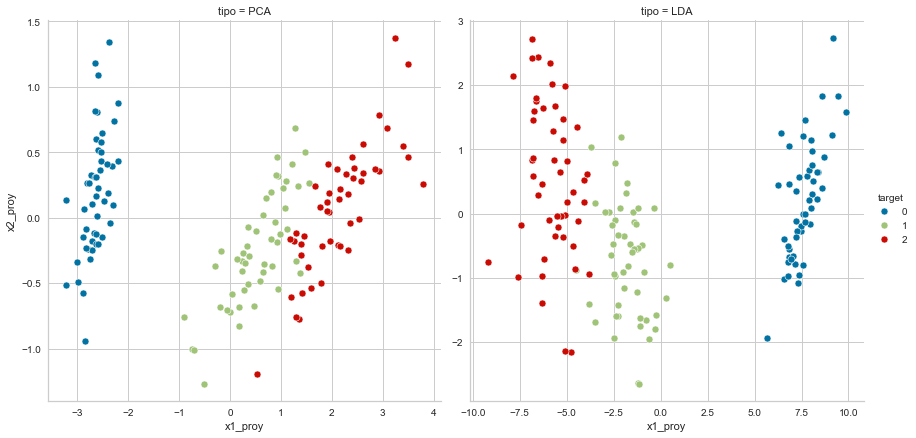

In [41]:
# LDA vs PCA

# cargar datos de dataset
iris = datasets.load_iris()

# datos X (input) e Y (target)
x = iris.data
y = iris.target

# nombre etiquetas de cada "y"
target = iris.target_names

# Dimension final
numero_componentes = 2

# Aplicar PCA (Principal component analysis)
pca = skl.decomposition.PCA(numero_componentes)
x_pca = pca.fit(x).transform(x)  # entrenar (fit) y posterior transformar (transform) a nueva dimension

# LDA (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit(x,y).transform(x)  # entrenar (fit) y posterior transformar (transform) a nueva dimension

# Aplicar PCA a datos
df1 = pd.DataFrame(x_pca)
df1 = df1.add_prefix('x')
df1['target']= y 
df1['tipo']='PCA'

# Aplicar LDA a datos
df2 = pd.DataFrame(x_lda)
df2 = df2.add_prefix('x')
df2['target']= y
df2['tipo']='LDA'

# Concatenar datos en 1 solo dataframe
dft = pd.concat([df1,df2])

# Graficar resultados -- PCA vs LDA
print('\n\nVer PCA vs LDA')
g = sns.FacetGrid(dft, col='tipo', hue="target",height=6,sharex=False,sharey=False)
g.map_dataframe(sns.scatterplot, x="x0", y="x1",sizes=6)
g.set_axis_labels("x1_proy", "x2_proy")
g.add_legend()
plt.show()
print('\n\n')


# fin

# SOM (Self-Organizing Map)

In [2]:
# SOM modelo de Mapeo Auto-Organizado 

# datos de prueba
iris = skl.datasets.load_iris()

# Cargar datos
x = iris.data[:,:2] # primeras 02 variables
y = iris.target # etiqueta de cada observacion

# definir dataframe con datos
datos = pd.DataFrame(x)
datos = datos.add_prefix('x')
datos['target']=y
datos['dato']='original'
datos['valor']=0    ## esto solo tiene sentido para el modelo SOM cuando se aplique la funcion "cluster"
datos['kmeans']= y  ## esto solo tiene sentido para los bloques de codigo posterior...aqui no

print('\nDimension X: ',x.shape)
print('Dimension Y: ',y.shape)
print('Clases de Y: ',len(set(y)))

datos # ver df

# fin


Dimension X:  (150, 2)
Dimension Y:  (150,)
Clases de Y:  3


,x0,x1,target,dato,valor,kmeans
0,5.1,3.5,0,original,0,0
1,4.9,3.0,0,original,0,0
2,4.7,3.2,0,original,0,0
3,4.6,3.1,0,original,0,0
4,5.0,3.6,0,original,0,0
...,...,...,...,...,...,...
145,6.7,3.0,2,original,0,2
146,6.3,2.5,2,original,0,2
147,6.5,3.0,2,original,0,2
148,6.2,3.4,2,original,0,2


Periodic Boundary Conditions active.
The weights will be initialised with PCA.
Training SOM... done!





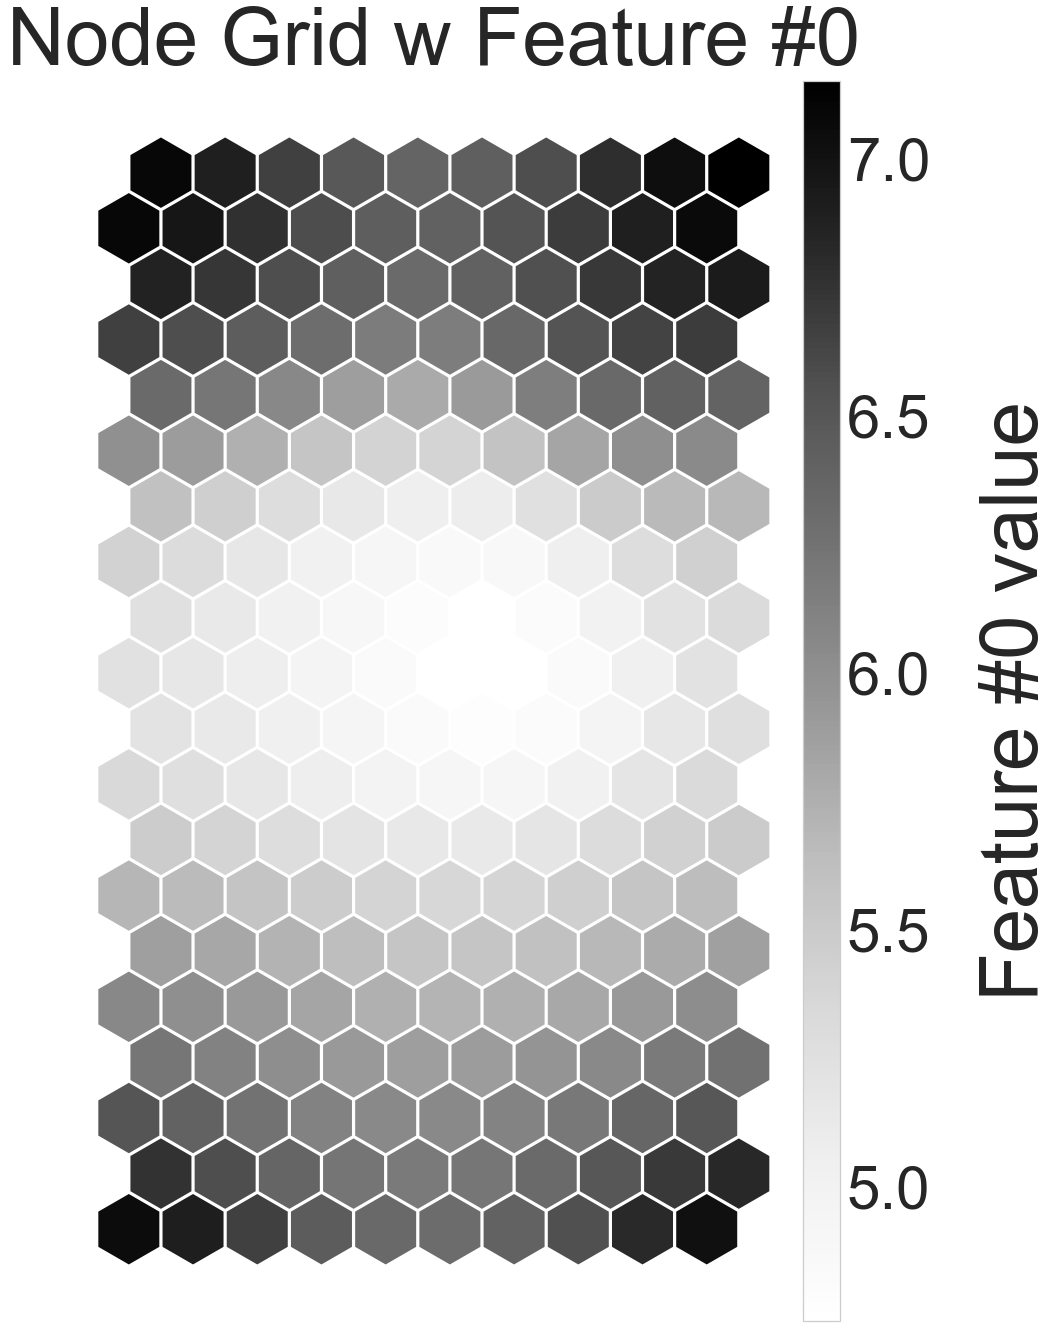

<Figure size 432x288 with 0 Axes>

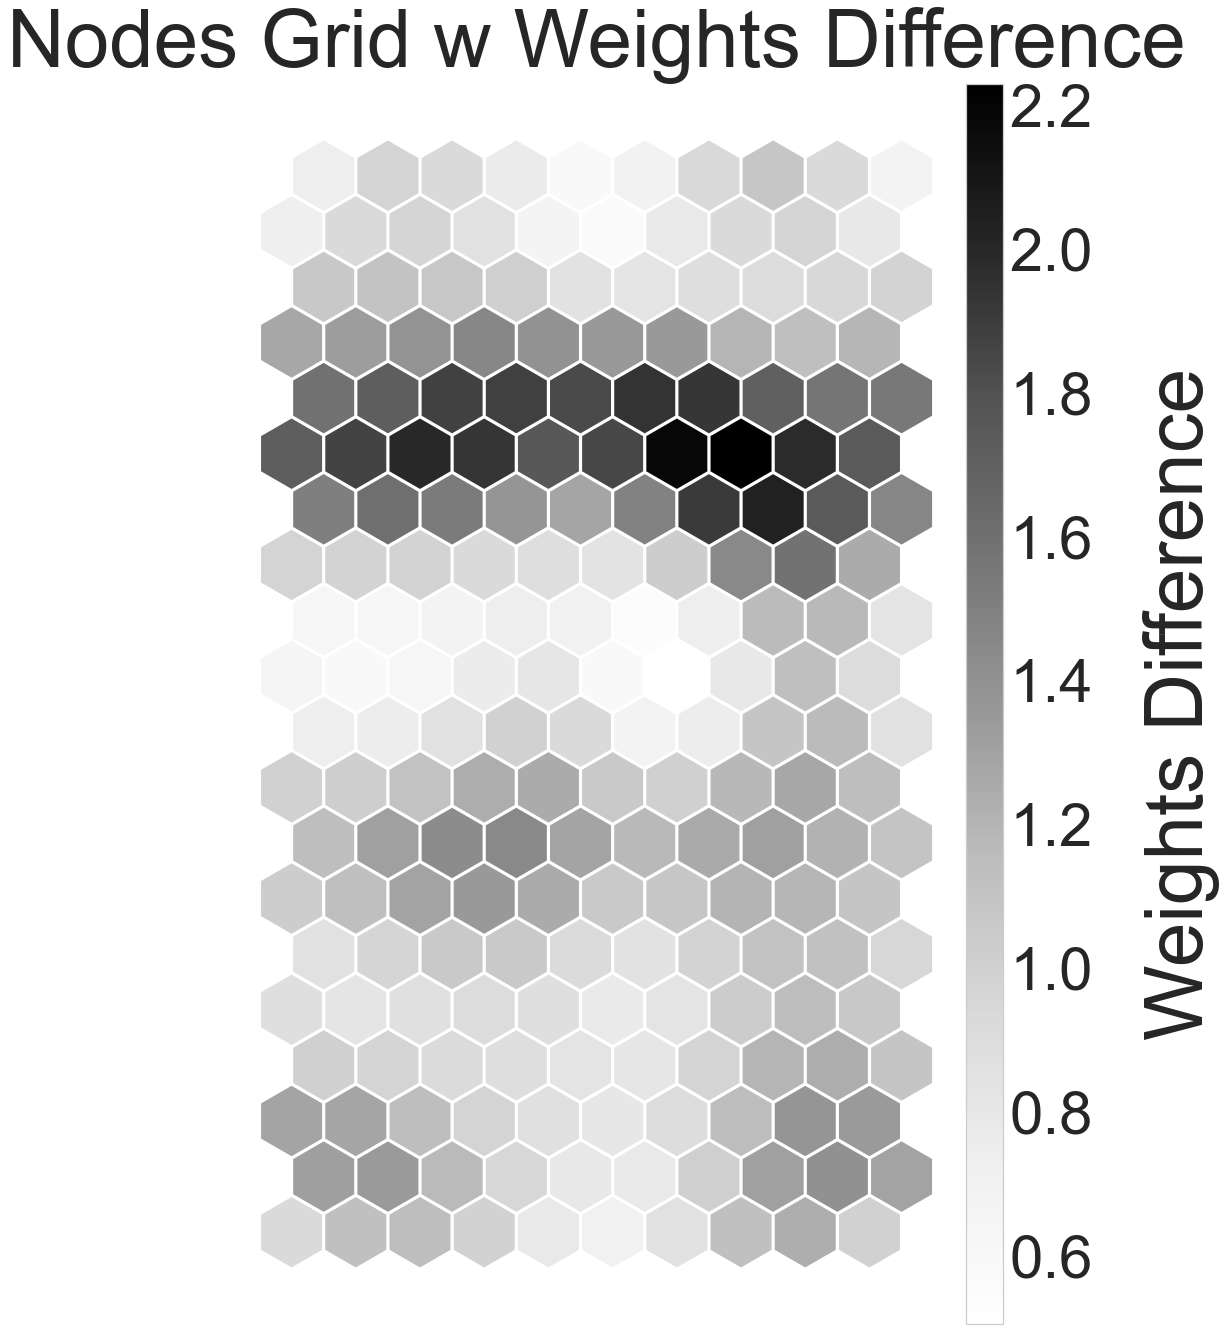

In [3]:
# definicion de modelo SOM

# Red Neuronal SOM con (m x n) de dimension en la capa de neuronas ... es un mapa o rectangulo de (m x n) neuronas
m = 20
n = 10

# Modelo SOM (Self Organization Map)
# PBC : activar/desactivar condiciones periodicas de limites ... solo qthresh funciona con esto
# PCI : activar/desactivar analisis principal de componentes para setear pesos de neuronas de manera incial
model = sps.somNet(m,n,x,PBC=True,PCI=True)
#model = sps.somNet(m,n,x,PBC=True)

# Entrenar modelo 
learning_rate = 0.1
iteraciones = 1000
model.train(learning_rate,iteraciones)

grafi = 1 # ver grafica de nodos y distancias
if (grafi):
    print('\n\n')
    
    # Graficar un mapa de los nodos de acuerdo a la variable.. con colnum se selecciona la variable a ver
    model.nodes_graph(colnum=0,show=True)
    # Graficar en funcion de a la distancia entre nodos y sus vecinos
    model.diff_graph()

# fin

<Figure size 432x288 with 0 Axes>

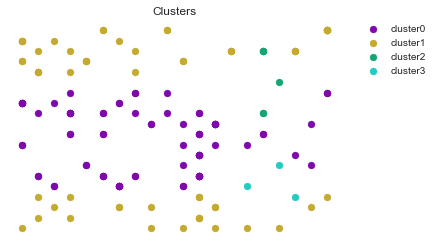


Dimension SOM predicted     :  (150, 2)
Cantidad grupos predichos    :  4
Cantidad elementos por grupo :  [80, 61, 6, 3]





<Figure size 432x288 with 0 Axes>

In [4]:
# Predecir datos del modelo SOM entrenado

# Proyectar a la dimension de datos X ... Esto es perfecto si solo se tiene NO SUPERVISADO ... Sin etiquetas
predi = model.project(x)
predi=np.array(predi)

# en caso de tener etiquetas (SUPERVISADO), usar: 
# model.project(x,y) 

# Clusterizacion basado en umbral 'qthresh' (Quality Threshold)
predi_cluster = model.cluster(x, type='qthresh',show=True)

######################################################################################################################

# La prediccion con el cluster indica cuantos grupos ha determinado y un numero
cluster_label = [] # grupo de cluster va de 0 a M ... Donde M es la cantidad de clusters detectados
cluster_value = [] # es el valor asignado por cluster ... un valor entero
cluster_cantidad = [] # se registrará la cantidad de elementos por cluster o agrupamiento detectado

idx = 0 # etiqueta de cluster
for axy in predi_cluster:
    cant = 0 # cantidad elementos por cluster
    for bxy in axy:
        cluster_label.append(idx) # numero de grupo 
        cluster_value = bxy # valor
        cant +=1 # un elemento mas
    idx +=1 # se aumenta en 01 el N° de Grupo
    cluster_cantidad.append(cant) # cantidad elementos por grupo 

#####################################################################################################################
    
# crear Kmeans con datos proyectados (predichos) con el modelo SOM

kmeans = skl.cluster.KMeans(n_clusters=len(predi_cluster), random_state=0).fit(predi)

# Recordar que len(predi_cluster) es la cantidad de grupos que sugirió SOM mediante su separacion por "qthresh" (Quality Threshold)
######################################################################################################################
    
    
# Crear data frame que albergará las predicciones del SOM
datos2 = pd.DataFrame(predi)
datos2 = datos2.add_prefix('x')
datos2['target'] = cluster_label # etiquetas nuevas
datos2['dato'] = 'som'
datos2['valor'] = cluster_value
datos2['kmeans'] = kmeans.labels_

# Crear data frame que albergará las proyecciones en "X" de SOM pero las etiquetas originales "y"
datos3 = pd.DataFrame(predi)
datos3 = datos3.add_prefix('x')
datos3['target'] = y # etiquetas orginales
datos3['dato'] = 'orig_som' # estas son las etiquetas "y" reales, pero X ha sido proyectado mediante SOM por lo que no es X sino X_proyected
datos3['valor'] = cluster_value
datos3['kmeans'] = y  ## esto servirá para poder comparar el etiquetado real vs el "Kmeans(modelo SOM)"

######################################################################################################################

# Dataframe con todos los datos ... originales y predichos por SOM
datos_todo = pd.concat([datos,datos2,datos3])

######################################################################################################################
    
print('\nDimension SOM predicted     : ',predi.shape)
print('Cantidad grupos predichos    : ',len(predi_cluster))
print('Cantidad elementos por grupo : ',cluster_cantidad)
print('\n\n')

# fin

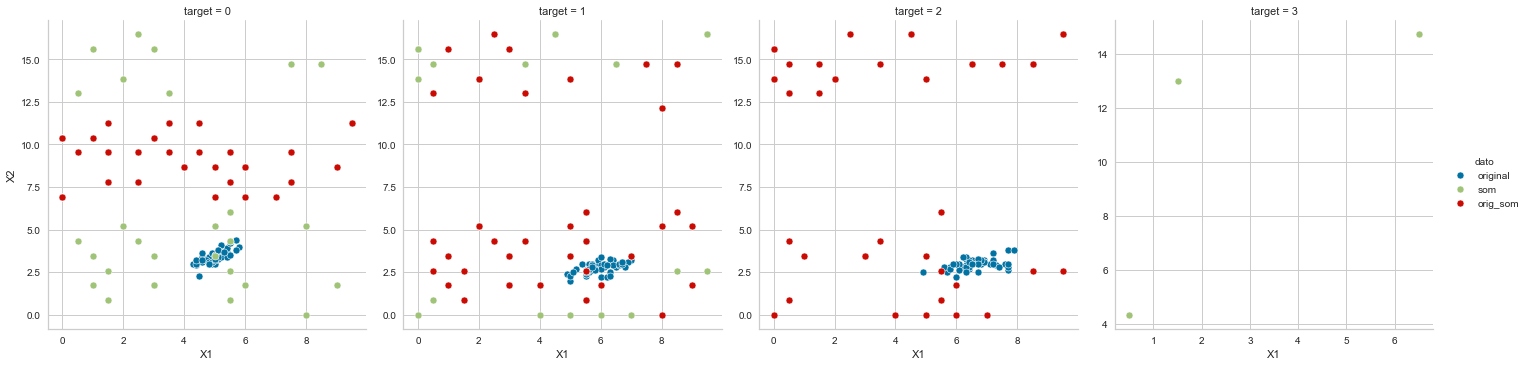

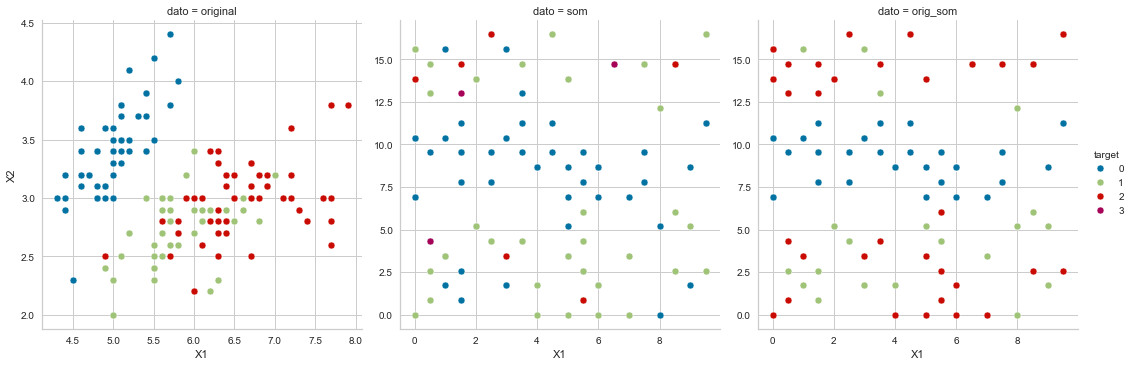

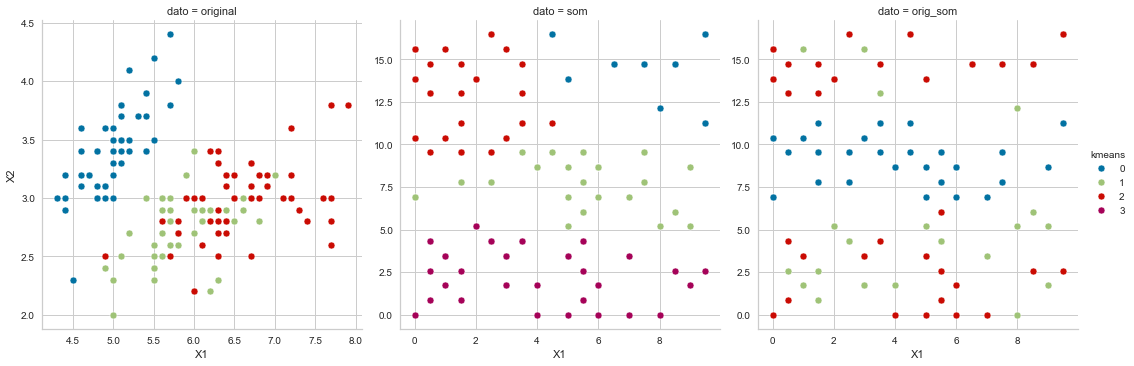

In [5]:
# Resultados en Grafica

# graficar por cada tipo de etiqueta o label 
g = sns.FacetGrid(datos_todo, col='target', hue="dato",height=5,sharex=False,sharey=False)
g.map_dataframe(sns.scatterplot, x="x0", y="x1",sizes=5)
g.set_axis_labels("X1", "X2")
g.add_legend()
plt.show()
print('\n\n')

# Graficar resultados -- por tipo de Dato "original" vs "SOM" (proyeccion predicha)
g = sns.FacetGrid(datos_todo, col='dato', hue="target",height=5,sharex=False,sharey=False)
g.map_dataframe(sns.scatterplot, x="x0", y="x1",sizes=5)
g.set_axis_labels("X1", "X2")
g.add_legend()
plt.show()
print('\n\n')

# Graficar resultados -- por tipo de Dato "original" vs "SOM" (proyeccion predicha) en KMEANS
g = sns.FacetGrid(datos_todo, col='dato', hue="kmeans",height=5,sharex=False,sharey=False)
g.map_dataframe(sns.scatterplot, x="x0", y="x1",sizes=5)
g.set_axis_labels("X1", "X2")
g.add_legend()
plt.show()

# fin

------------
-----------

<br>Se puede encontrar esta libreria en : https://github.com/njali2001/popsom/blob/master/popsom.py  <br><br>
Esta libreria no se puede instalar desde pip o conda, se debe descargar el zip en github y copiar+pegar el archivo .py a la carpeta donde se esta trabajando el notebook python y llamarse tal cual otra libreria (Ejemplo: import popsom as som) <br>

## Ejemplo 01 - Aprendizaje No Supervisado

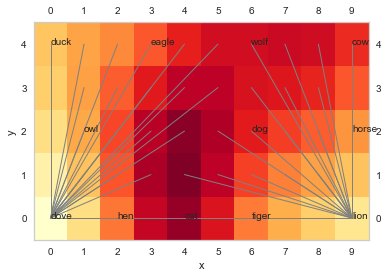

In [141]:
# Ejemplo 01 - Aprendizaje No Supervisado - Clusterizacion

#import popsom as som

# Ejemplo de SOM con matriz de 13 animales con 13 caracteristicas

animal = ['dove','hen','duck','owl','eagle','fox','dog','wolf','cat','tiger','lion','horse','cow']
attribute = [[1,0,0,1,0,0,0,0,1,0,0,1,0],
             [1,0,0,1,0,0,0,0,1,0,0,0,0],
             [1,0,0,1,0,0,0,0,1,0,0,1,1],
             [1,0,0,1,0,0,0,0,1,1,0,1,0],
             [0,1,0,1,0,0,0,0,1,1,0,0,0],
             [0,1,0,1,0,0,0,0,1,1,0,0,0],
             [0,1,0,0,1,1,0,0,0,0,1,0,0],
             [0,1,0,0,1,1,0,1,0,1,1,0,0],
             [1,0,0,0,1,1,0,0,0,1,0,0,0],
             [0,0,1,0,1,1,0,0,0,1,1,0,0],
             [0,0,1,0,1,1,0,1,0,1,1,0,0],
             [0,0,1,0,1,1,1,1,0,0,1,0,0],
             [0,0,1,0,1,1,1,0,0,0,0,0,0]]

attr = pd.DataFrame(attribute)
attr.columns = ['small','medium','big','2 legs','4 legs','hair','hooves','mane','feathers','hunt','run','fly','swim']

# crear un mapa SOM con dimension (xdim x ydim)
m = som.map(xdim=10,ydim=5)

# entrenar
m.fit(attr,animal)

# mostrar mapa
m.starburst()

## Analizar la funcion "starburst()"
#def starburst(self, explicit=False, smoothing=2, merge_clusters=True,  merge_range=.25):

## parameters:
# explicit - controls the shape of the connected components
# smoothing - controls the smoothing level of the umat (NULL,0,>0)
# merge_clusters - a switch that controls if the starburst clusters are merged together
# merge_range - a range that is used as a percentage of a certain distance in the code to determine whether components are closer to their centroids or centroids closer to each other.


# fin

## Ejemplo 02 - Aprendizaje Supervisado



(Ejemplo) Vector de pesos a neurona (x=0,y=2):  [5.0992 3.5095 1.621  0.3071]





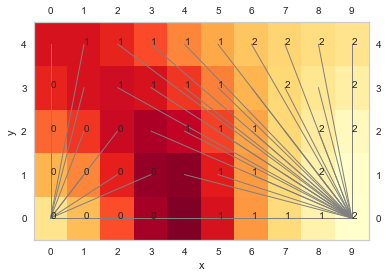

In [154]:
# Ejemplo 2 .... Aprendizaje Supervisado

# cargar datos
iris = datasets.load_iris()
labels = iris.target
data = pd.DataFrame(iris.data[:, :4])
data.columns = iris.feature_names

# unir en el mismo dataframe a datos + labels
data_todo = data.copy()
data_todo['labels_original']=labels


# crear objeto SOM ... dimension (xdim x ydim) ... ojo norm es normalizar los datos de entrada
m = som.map(xdim=10,ydim=5,train=1000,norm=False)

# ajustar datos ... (datos,etiquetas)..es un Supervisado
m.fit(data,labels)

# graficar el mapa entrenado som
m.starburst()

# se puede acceder a los pesos de cada neurona en el mapa (x,y) mediante
neurona1_2 = m.neuron(1,2) # pesos de las neuronas conectadas al punto (1,2) del mapa SOM creado
print('\n\n(Ejemplo) Vector de pesos a neurona (x=0,y=2): ',np.round(neurona1_2,4))

### Nota: recordar que m.neuron(x,y) tendrá un vector de n_vectores de los datos originales

print('\n\n')

# fin



Significancia (%):  [14.99  4.15 68.15 12.71] 



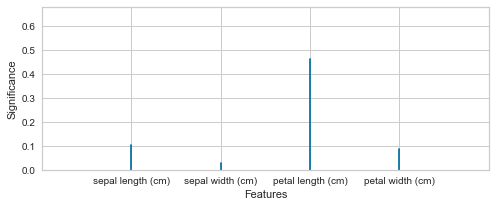

In [155]:
# como es supervisado, revisar la importancia por variable

plt.figure(figsize=(8,3))
m.significance(graphics=True,feature_labels=True)
signi = m.significance(graphics=False,feature_labels=True)

print('\n\nSignificancia (%): ',np.round(100.0*signi,2),'\n')

# fin

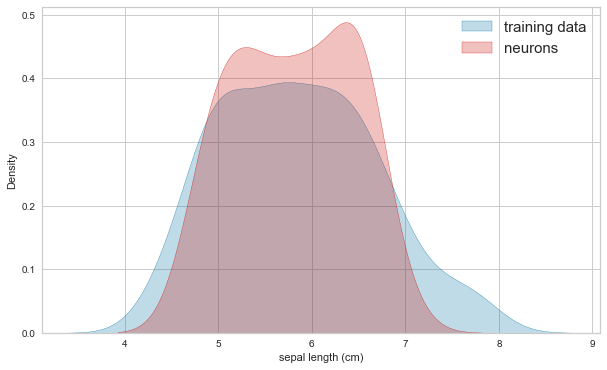

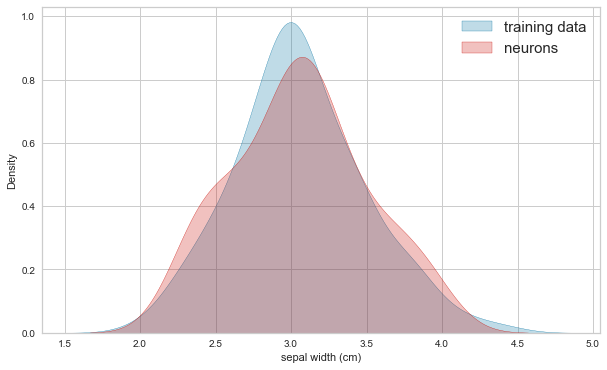

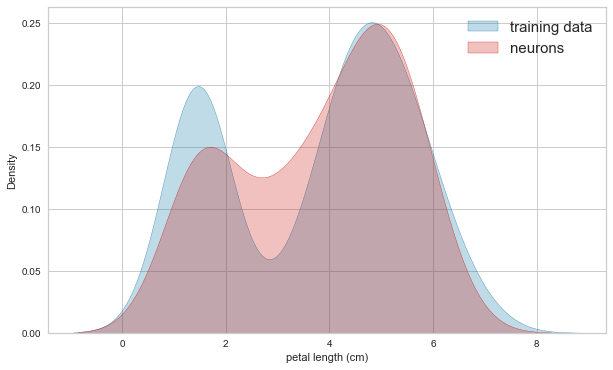

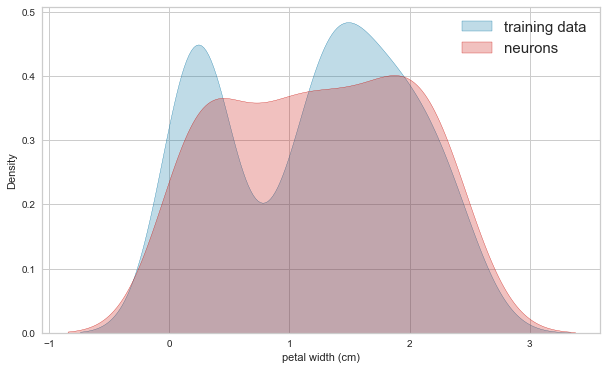

In [156]:
# obtener los marginales de cada variables segun neuronas

plt.figure(figsize=(10,6))
v1 = m.marginal(0) ## relacionado data.columns[0]
plt.figure(figsize=(10,6))
v2 = m.marginal(1) ## relacionado data.columns[1]
plt.figure(figsize=(10,6))
v3 = m.marginal(2) ## relacionado data.columns[2]
plt.figure(figsize=(10,6))
v4 = m.marginal(3) ## relacionado data.columns[3]

## Importante: Aqui lo que se busca visualizar y demostrar es que la distribucion que logran las neuronas
## en los valores que abarcan o cubrer son en "Distribucion" practicamente iguales en densidad que las variables
# de entrada como tales ... es decir f(variable) == f(neuronas)
# es decir, que imitan muy bien los valores que toman las variables de entrada

# fin

In [157]:
# proyeccion de los datos de entrada a los elementos del mapa creado

proyeccion = m.projection()

## Nota: en la proyeccion (x,y) es la neurona del mapa (rectangulo de tamaño (xdim x ydim))

# dataframe que concatena la proyeccion + datos originales
todo = pd.concat([proyeccion,data_todo],axis=1) # horizontalmente se concatena

todo # ver todo

# fin

,labels,x,y,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels_original
0,0,1,1,5.1,3.5,1.4,0.2,0
1,0,0,2,4.9,3.0,1.4,0.2,0
2,0,0,0,4.7,3.2,1.3,0.2,0
3,0,0,2,4.6,3.1,1.5,0.2,0
4,0,1,1,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...,...,...
145,2,9,0,6.7,3.0,5.2,2.3,2
146,2,7,4,6.3,2.5,5.0,1.9,2
147,2,8,0,6.5,3.0,5.2,2.0,2
148,2,8,2,6.2,3.4,5.4,2.3,2


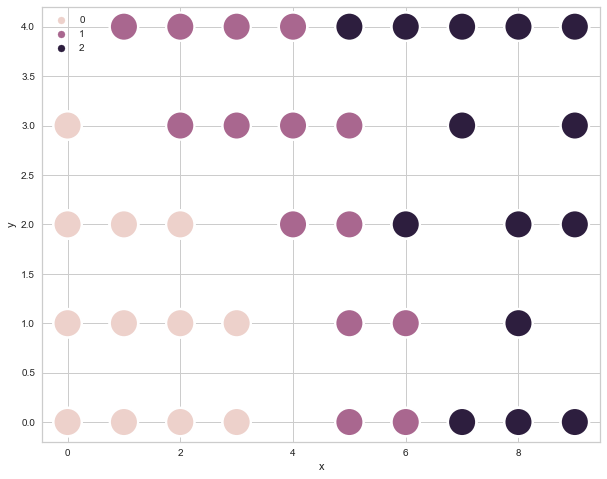

In [163]:
# grafica con el dataframe todo

plt.figure(figsize=(10,8))
sns.scatterplot(data=todo,x='x',y='y',hue='labels_original',s=800)
plt.legend()

# fin

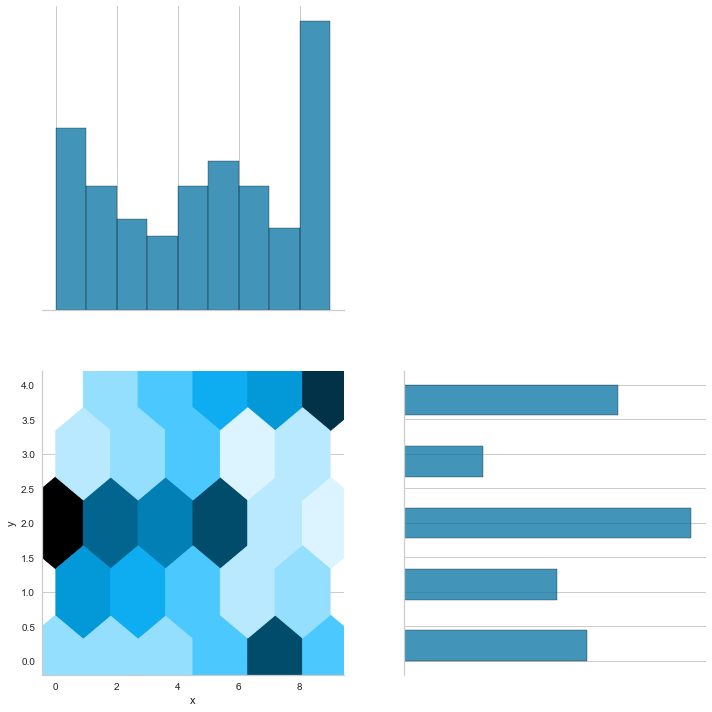

In [172]:
# grafica con el dataframe todo

sns.jointplot(data=todo, x='x', y='y', kind="hex",height=10,ratio=1)